In [825]:
# Importing libraries and packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [826]:
# Loading data
weekly = load_data('weekly')

### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [827]:
# Display correlation of variables
weekly.corr()

C:\Users\PCS\AppData\Local\Temp\ipykernel_4452\1458639262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weekly.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Text(0, 0.5, 'Volume')

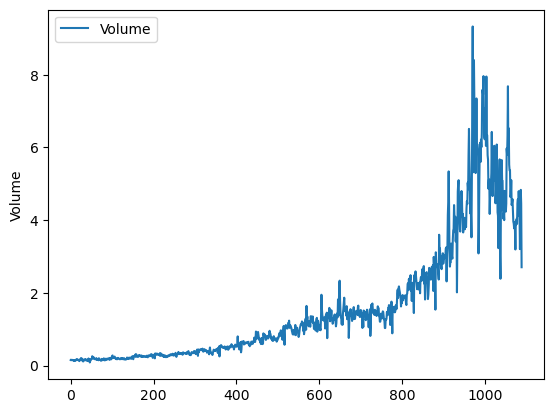

In [873]:
# Plot the volume data
weekly.plot(y = 'Volume')
plt.ylabel('Volume')

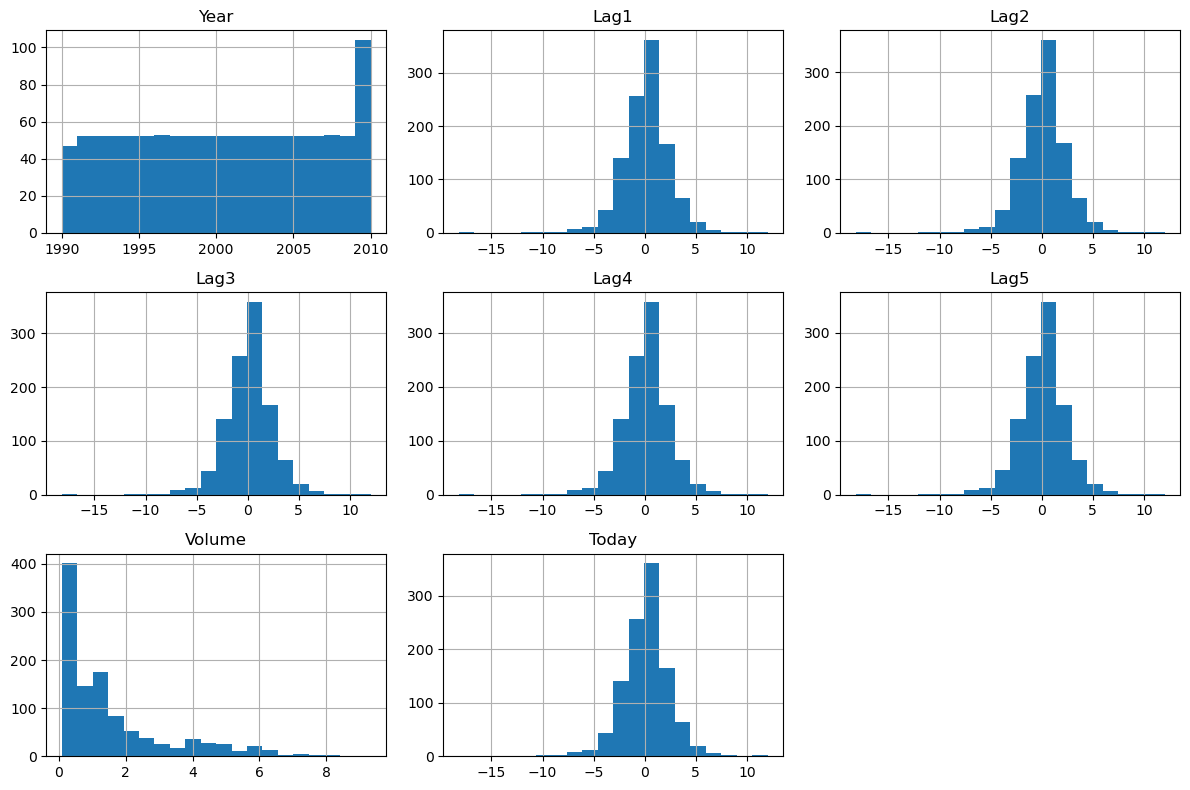

In [829]:
# Create histograms for numerical variables
num_vars = ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']
weekly[num_vars].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically signifcant? If so, which ones?

In [830]:
# Selecting features and train logistic model
allvars = weekly.columns.drop(['Direction', 'Today', 'Year'])
design = MS(allvars)
X = design.fit_transform(weekly)
y = weekly.Direction == 'Up'
logistic_model = sm.GLM(y,
X,
family=sm.families.Binomial())
results = logistic_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Wed, 27 Mar 2024   Deviance:                       1486.4
Time:                        13:06:43   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

* From above results the __Lag2__ is appear to be significant because its __P_value__ is small

### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [831]:
# Predicting the results
probs = results.predict()
probs[:10]

array([0.60862494, 0.60103144, 0.58756995, 0.48164156, 0.61690129,
       0.56841902, 0.57860971, 0.51519724, 0.57151998, 0.55542873])

In [832]:
# Making the labels vector to display confusion matrix
labels = np.array(['Down']*1089)
labels[probs > 0.5] = "Up"

In [833]:
# Displaying confusion matrix
confusion_table(labels, weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [834]:
# Calculate accuracy
(54+557)/1089, np.mean(labels == weekly.Direction)

(0.5610651974288338, 0.5610651974288338)

### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [835]:
# Selecting only one feature
design = MS(['Lag2'])
X = design.fit_transform(weekly)
y = weekly.Direction == 'Up'

In [836]:
# Split data into train and test
train = (weekly.Year < 2009)
X_train , X_test = X.loc[train], X.loc[~train]
y_train , y_test = y.loc[train], y.loc[~train]

In [837]:
# Fit data into logistic model
glm_train = sm.GLM(y_train ,
X_train ,
family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(X_test)

In [838]:
# Split direction column into train and test
D = weekly.Direction
L_train , L_test = D.loc[train], D.loc[~train]

In [839]:
# Display confusion matrix
labels = np.array(['Down']*104)
labels[probs >0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [840]:
# Calculating accuracy
np.mean(labels == L_test), np.mean(labels != L_test)

(0.625, 0.375)

### (e) Repeat (d) using LDA.

In [841]:
# Fitting data into Linear Discriminant Analysis
lda = LDA(store_covariance=True)
X_train , X_test = [M.drop(columns=['intercept'])
for M in [X_train , X_test]]
lda.fit(X_train , L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [842]:
# Displaying confusion matrix
lda_pred = lda.predict(X_test)
confusion_table(lda_pred , L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [843]:
# Calculating accuracy and error
np.mean(lda_pred == L_test), np.mean(lda_pred != L_test)

(0.625, 0.375)

### (f) Repeat (d) using QDA.

In [844]:
# Fitting data into Quadratic Discriminant Analysis
qda = QDA(store_covariance=True)
qda.fit(X_train , L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [845]:
# Displaying confusion matrix
qda_pred = qda.predict(X_test)
confusion_table(qda_pred , L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [846]:
# Calculating accuracy and error
np.mean(qda_pred == L_test), np.mean(qda_pred != L_test)

(0.5865384615384616, 0.41346153846153844)

### (g) Repeat (d) using KNN with K = 1.

In [847]:
# Fitting data into K Nearest Neighbors
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train , L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred , L_test)

Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


In [848]:
# Calculating accuracy and error
np.mean(knn1_pred == L_test), np.mean(knn1_pred != L_test)

(0.5, 0.5)

### (h) Repeat (d) using naive Bayes.

In [849]:
NB = GaussianNB()
NB.fit(X_train , L_train)

GaussianNB()

In [850]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels , L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [851]:
# Calculating accuracy and error
np.mean(nb_labels == L_test), np.mean(nb_labels != L_test)

(0.5865384615384616, 0.41346153846153844)

### (i) Which of these methods appears to provide the best results on this data?

* According to the above results of all the models, the logistic model and linear discriminant analysis model provides the best results on the data with only one predictor __Lag2__.

### (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods.

#### Train KNN with different values of K

In [852]:
for K in range(1,6):
    knn1 = KNeighborsClassifier(n_neighbors=K)
    knn1.fit(X_train , L_train)
    knn1_pred = knn1.predict(X_test)
    C = confusion_table(knn1_pred , L_test)
    templ = ('accuracy {} %')
    print(templ.format(
    (np.mean(knn1_pred == L_test))))

accuracy 0.5 %
accuracy 0.47115384615384615 %
accuracy 0.5480769230769231 %
accuracy 0.5769230769230769 %
accuracy 0.5384615384615384 %


#### Train Logistic Model with two predictors Lag1 and Lag2

In [853]:
# Selecting predictors
design = MS(['Lag1', 'Lag2'])
X = design.fit_transform(weekly)

In [854]:
# Split data into train and test
train = (weekly.Year < 2009)
X_train , X_test = X.loc[train], X.loc[~train]
y_train , y_test = y.loc[train], y.loc[~train]

In [855]:
# Fit data into logistic model
glm_train = sm.GLM(y_train ,
X_train ,
family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(X_test)

In [856]:
# Split direction column into train and test
D = weekly.Direction
L_train , L_test = D.loc[train], D.loc[~train]

In [857]:
# Display confusion matrix
labels = np.array(['Down']*104)
labels[probs >0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,7,8
Up,36,53


In [858]:
# Calculating accuracy
np.mean(labels == L_test), np.mean(labels != L_test)

(0.5769230769230769, 0.4230769230769231)

#### Train Logistic Model with two predictors Lag1 and squared Lag2

In [859]:
# Selecting predictors
design = MS(['Lag1', poly('Lag2', 2)])
X = design.fit_transform(weekly)

In [860]:
# Split data into train and test
train = (weekly.Year < 2009)
X_train , X_test = X.loc[train], X.loc[~train]
y_train , y_test = y.loc[train], y.loc[~train]

In [861]:
# Fit data into logistic model
glm_train = sm.GLM(y_train ,
X_train ,
family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(X_test)

In [862]:
# Split direction column into train and test
D = weekly.Direction
L_train , L_test = D.loc[train], D.loc[~train]

In [863]:
# Display confusion matrix
labels = np.array(['Down']*104)
labels[probs >0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,8,11
Up,35,50


In [864]:
# Calculating accuracy
np.mean(labels == L_test), np.mean(labels != L_test)

(0.5576923076923077, 0.4423076923076923)

#### Train LDA Model with two predictors Lag1 and squared Lag2

In [865]:
# Fitting data into Linear Discriminant Analysis
lda = LDA(store_covariance=True)
X_train , X_test = [M.drop(columns=['intercept'])
for M in [X_train , X_test]]
lda.fit(X_train , L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [866]:
# Displaying confusion matrix
lda_pred = lda.predict(X_test)
confusion_table(lda_pred , L_test)

Truth,Down,Up
Predicted,,
Down,8,11
Up,35,50


In [867]:
# Calculating accuracy and error
np.mean(lda_pred == L_test), np.mean(lda_pred != L_test)

(0.5576923076923077, 0.4423076923076923)

#### Train QDA Model with two predictors Lag1 and squared Lag2

In [868]:
# Fitting data into Quadratic Discriminant Analysis
qda = QDA(store_covariance=True)
qda.fit(X_train , L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [869]:
# Displaying confusion matrix
qda_pred = qda.predict(X_test)
confusion_table(qda_pred , L_test)

Truth,Down,Up
Predicted,,
Down,4,3
Up,39,58


In [870]:
# Calculating accuracy and error
np.mean(qda_pred == L_test), np.mean(qda_pred != L_test)

(0.5961538461538461, 0.40384615384615385)

#### Train KNN with different values of K

In [871]:
for K in range(1,6):
    knn1 = KNeighborsClassifier(n_neighbors=K)
    knn1.fit(X_train , L_train)
    knn1_pred = knn1.predict(X_test)
    C = confusion_table(knn1_pred , L_test)
    templ = ('accuracy {} %')
    print(templ.format(
    (np.mean(knn1_pred == L_test))))

accuracy 0.46153846153846156 %
accuracy 0.4423076923076923 %
accuracy 0.4423076923076923 %
accuracy 0.4326923076923077 %
accuracy 0.4230769230769231 %


* When transform __Lag2__ into quadratic than Quadratic Discriminant Analysis have greater accuracy with predictors __Lag1__ and __Lag2__